<a href="https://colab.research.google.com/github/fonsecajr/Projects/blob/master/A%C3%A7%C3%B5es_Analises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Importando bibliotecas

In [0]:
# https://github.com/numpy/numpy
import numpy as np

# https://github.com/pandas-dev/pandas
import pandas as pd

# https://github.com/pydata/pandas-datareader
import pandas_datareader as web

# https://github.com/matplotlib/matplotlib
import matplotlib.pyplot as plt

# https://github.com/mwaskom/seaborn 
import seaborn as sns
sns.set()

# https://github.com/jupyter-widgets/ipywidgets
import ipywidgets as widgets

# https://github.com/ranaroussi/yfinance
!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf
yf.pdr_override()

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


  Created wheel for yfinance: filename=yfinance-0.1.54-py2.py3-none-any.whl size=22409 sha256=44fd8e70436466a1744a67f95ab82a76f0208301e9a9505c6a2ea4649761a856
  Stored in directory: /tmp/pip-ephem-wheel-cache-9p2d9qmt/wheels/f9/e3/5b/ec24dd2984b12d61e0abf26289746c2436a0e7844f26f2515c
Successfully built yfinance
     |████████████████████████████████| 92kB 2.8MB/s 
     |████████████████████████████████| 51kB 7.0MB/s 
  Created wheel for pyfolio: filename=pyfolio-0.9.2-cp36-none-any.whl size=88668 sha256=ac678c5cb4f23012b1fe31f83c4a760b843a94382d37948e73b1c5041ad475d9
  Stored in directory: /root/.cache/pip/wheels/0d/a8/7d/ac33fe6bf6f3db370291c9de303460d00b8f97cc40a1d80f72
  Created wheel for empyrical: filename=empyrical-0.5.3-cp36-none-any.whl size=37087 sha256=252997858a2d11f7cee9978e413b2851c8d303b0b5ec01fbefb4024c3f351fa7
  Stored in directory: /root/.cache/pip/wheels/10/a4/3b/951bd609878a82fd72b9ea23699daf1eaada4ff6f583152876
Successfully built pyfolio empyrical


/usr/local/lib/python3.6/dist-packages/pyfolio/pos.py:28: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  ' to position notionals.'


# 2. Obtendo e tratando os dados.

In [0]:
# Selecione o Ativo.
d = widgets.Dropdown(options=['^BVSP', 'ITUB3.SA', 'ITUB4.SA', 'ITSA3.SA', 'ITSA4.SA', 'VALE3.SA'], value=None)
d

Dropdown(options=('^BVSP', 'ITUB3.SA', 'ITUB4.SA', 'ITSA3.SA', 'ITSA4.SA', 'VALE3.SA'), value=None)

In [0]:
# %d Defina a seleção.
d = d.value
d

'ITUB3.SA'

In [0]:
# %ativo Carregue o Ativo selecionado.
ativo = web.get_data_yahoo(d)


In [0]:
# Conheça os dados mais antigos para o Ativo.
ativo.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-05-15,19.641899,19.278200,19.278200,19.641899,193116.0,15.340974
2015-05-18,19.663900,19.294800,19.663900,19.344400,560653.0,15.108614
2015-05-19,19.559200,18.787901,19.427000,19.118500,382965.0,14.932187
2015-05-20,19.063400,18.754801,18.986200,18.931101,389136.0,14.785815
2015-05-21,18.754801,18.484800,18.743799,18.589500,1082284.0,14.519016


In [0]:
# Conheça os dados mais recentes para o Ativo.
ativo.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-05-06,21.990000,21.400000,21.990000,21.500000,1020900.0,21.500000
2020-05-07,21.980000,20.500000,21.980000,20.799999,623800.0,20.799999
2020-05-08,21.900000,20.799999,20.799999,21.340000,943000.0,21.340000
2020-05-11,21.900000,21.240000,21.340000,21.709999,1053700.0,21.709999
2020-05-12,21.809999,20.879999,21.709999,20.900000,749800.0,20.900000


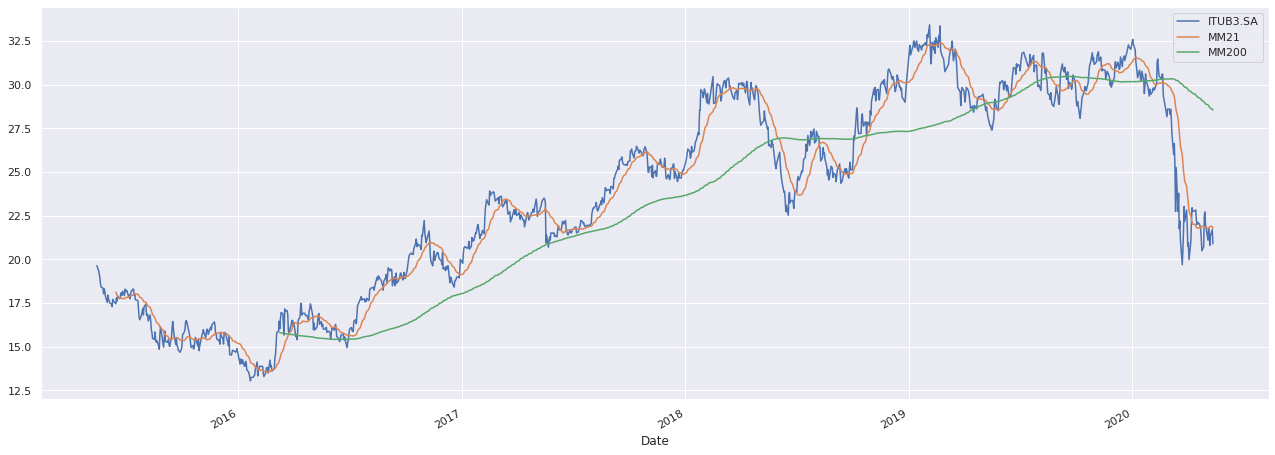

In [0]:
# Desenhe um gráfico com médias móveis para as referencias de fechamento de todo o período do dado do Ativo.
ativo["Close"].plot(figsize=(22,8), label=d)
ativo["Close"].rolling(21).mean().plot(label="MM21")
ativo["Close"].rolling(200).mean().plot(label="MM200")
plt.legend()

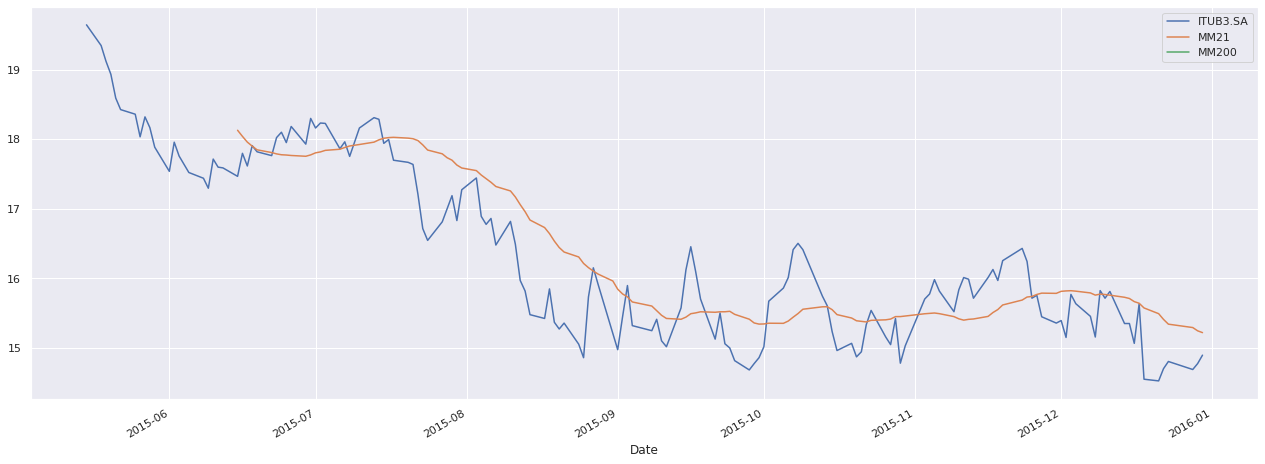

In [0]:
# %ativo_ano Desenhe um gráfico com médias móveis para as referências de fechamento do período de um ano do Ativo.
ativo_ano = ativo[ativo.index.year == 2015]
ativo_ano["Close"].plot(figsize=(22,8), label=d)
ativo_ano["Close"].rolling(21).mean().plot(label="MM21")
ativo_ano["Close"].rolling(200).mean().plot(label="MM200")
plt.legend()

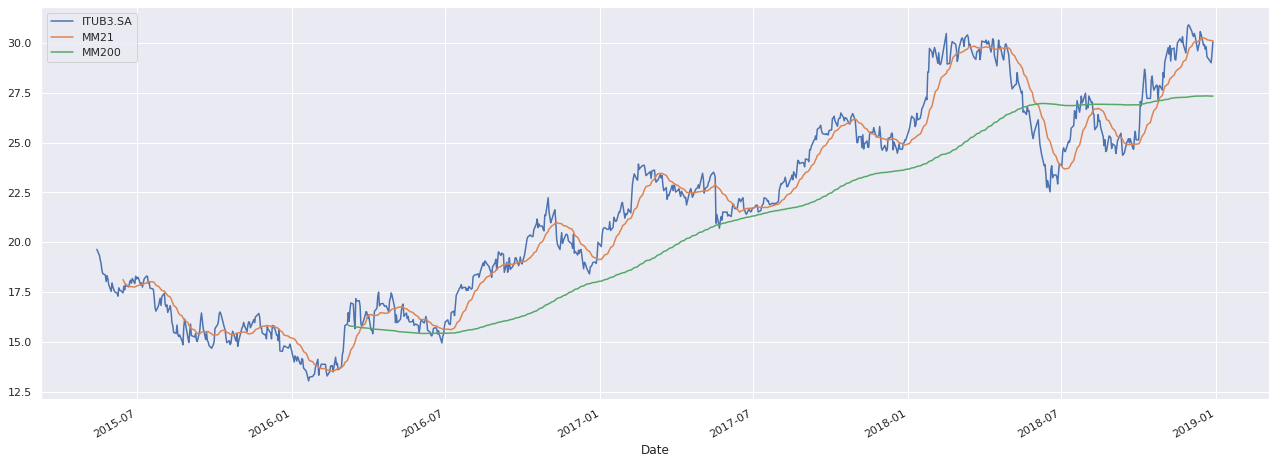

In [0]:
# %ativo_ano2 Desenhe um gráfico com médias móveis para as referências de um período entre anos do Ativo.
ativo_ano2 = ativo[(ativo.index.year >= 2015) & (ativo.index.year <= 2018)]
ativo_ano2["Close"].plot(figsize=(22,8), label=d)
ativo_ano2["Close"].rolling(21).mean().plot(label="MM21")
ativo_ano2["Close"].rolling(200).mean().plot(label="MM200")
plt.legend()

In [0]:
# %ativo_dia Relacione os dados para um dia específico para 50(máximo) repetições do Ativo.
ativo_dia = ativo[ativo.index.day == 14]
ativo_dia.tail(50)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-07-14,18.424200,18.145500,18.424200,18.284800,240405.0,14.304749
2015-08-14,15.690900,15.297000,15.624200,15.478800,139425.0,12.388463
2015-09-14,15.672700,15.036400,15.066700,15.575800,63360.0,12.478410
2015-10-14,15.836400,15.497000,15.751500,15.606100,62370.0,12.515317
2015-12-14,15.800000,15.351500,15.684800,15.351500,89760.0,12.500587
2016-01-14,14.115200,13.703000,13.939400,14.115200,620235.0,11.505465
2016-03-14,17.260599,16.745501,17.084801,16.903000,551925.0,13.807972
2016-04-14,17.527300,16.793900,17.527300,16.812099,125400.0,13.746453
2016-06-14,15.703000,15.151500,15.618200,15.345500,98010.0,12.570379


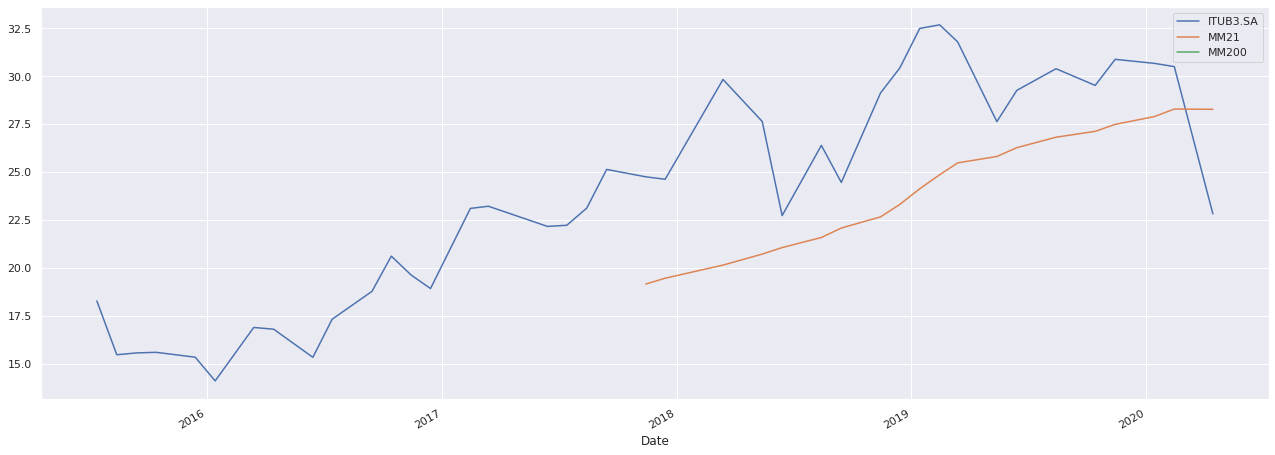

In [0]:
# Desenhe um gráfico com médias móveis para o relacionamento anterior.
ativo_dia["Close"].plot(figsize=(22,8), label=d)
ativo_dia["Close"].rolling(21).mean().plot(label="MM21")
ativo_dia["Close"].rolling(200).mean().plot(label="MM200")
plt.legend()

In [0]:
# %ativo_mes elacione os dados para um mês específico para 100(máximo) repetições do Ativo.
ativo_mes = ativo[ativo.index.month == 12]
ativo_mes.tail(100)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-12-01,15.600000,15.266700,15.497000,15.393900,105435.0,12.369556
2015-12-02,15.430300,15.012100,15.400000,15.151500,226050.0,12.174779
2015-12-03,16.327299,15.478800,15.484800,15.769700,556710.0,12.671526
2015-12-04,15.757600,15.254500,15.757600,15.636400,328515.0,12.564414
2015-12-07,15.806100,15.357600,15.678800,15.454500,117975.0,12.418251
...,...,...,...,...,...,...
2019-12-20,31.650000,31.389999,31.469999,31.389999,258600.0,30.805807
2019-12-23,31.799999,31.350000,31.700001,31.799999,358200.0,31.208174
2019-12-26,32.279999,31.650000,31.799999,32.279999,377100.0,31.679241


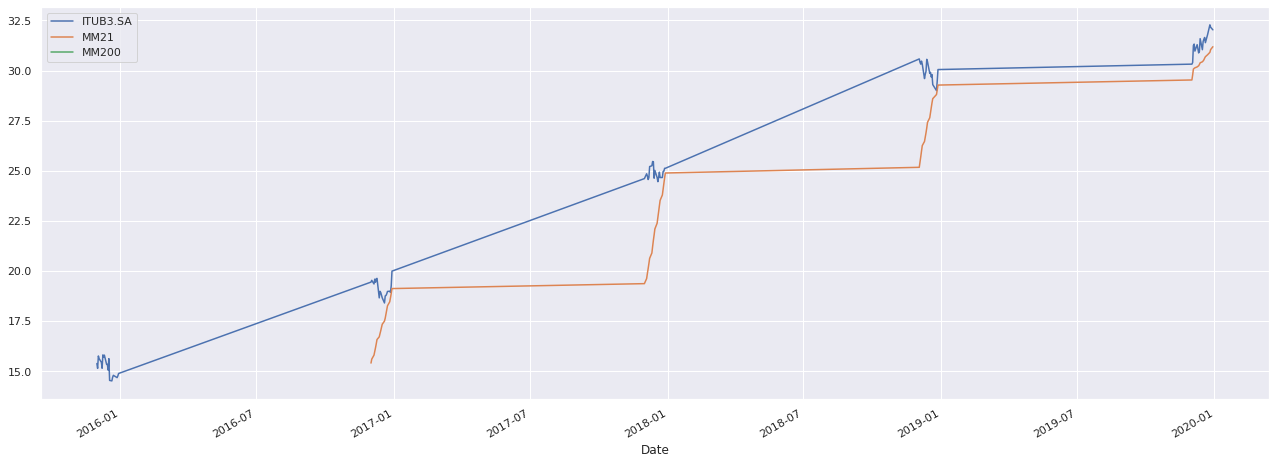

In [0]:
# Desenhe um gráfico com médias móveis para o relacionamento anterior.
ativo_mes["Close"].plot(figsize=(22,8), label=d)
ativo_mes["Close"].rolling(21).mean().plot(label="MM21")
ativo_mes["Close"].rolling(200).mean().plot(label="MM200")
plt.legend()

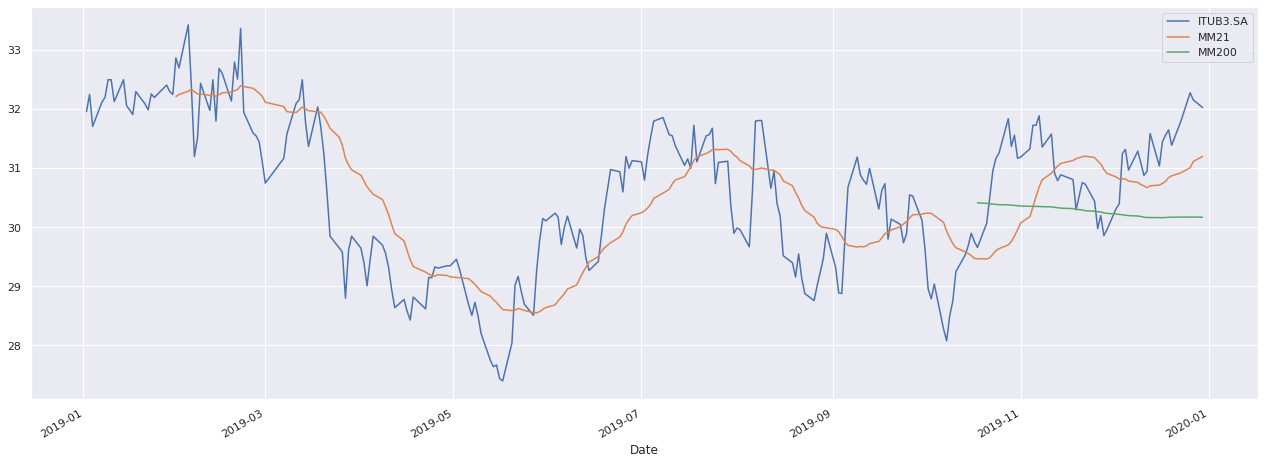

In [0]:
# %ativo2 Carregue o Ativo para um intervalo definido de data.
ativo2 = web.get_data_yahoo(d, start='2019-01-01', end='2020-01-01')
ativo2["Close"].plot(figsize=(22,8), label=d)
ativo2["Close"].rolling(21).mean().plot(label="MM21")
ativo2["Close"].rolling(200).mean().plot(label="MM200")
plt.legend()

In [0]:
# %portfolio Estabelecendo relações entre Ativos.
tickers = ["^BVSP", "USDBRL=X"]
portfolio = web.get_data_yahoo(tickers)["Close"]
portfolio

Symbols,^BVSP,USDBRL=X
Date,,
2015-05-14,NaN,2.98990
2015-05-15,57249.000000,NaN
2015-05-17,NaN,2.99140
2015-05-18,56204.000000,3.00580
2015-05-19,55499.000000,3.03160
...,...,...
2020-05-07,78119.000000,5.82872
2020-05-08,80263.000000,NaN
2020-05-10,NaN,5.47700


In [0]:
# Limpar a tabela dropando os dados faltantes (NaN).
portfolio = portfolio.dropna()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fad54729b70>,
      dtype=object)

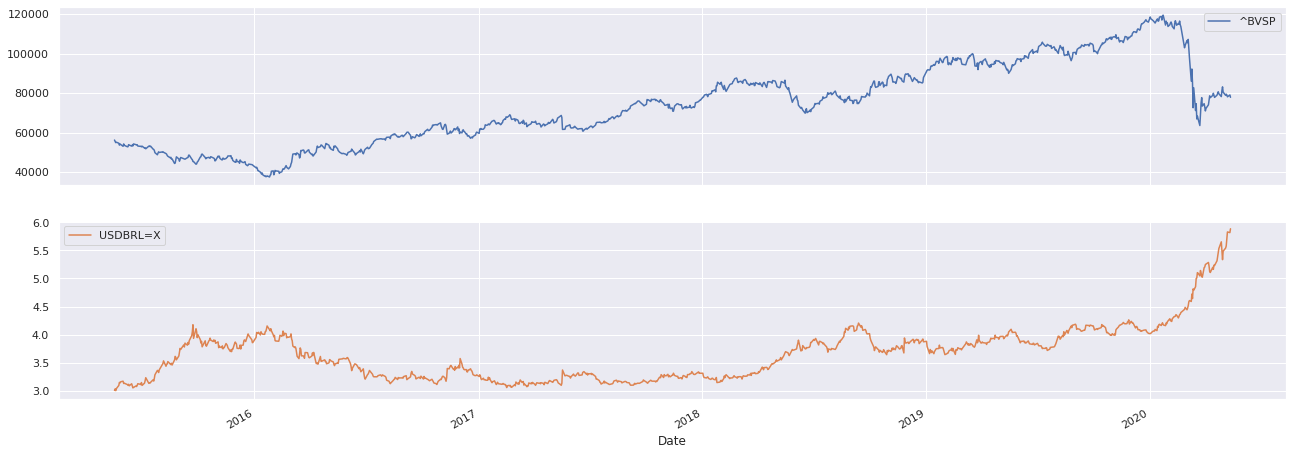

In [0]:
# Desenhe o gráfico da correlação anterior
portfolio.plot(subplots=True, figsize=(22,8))

In [0]:
# Estabelecer uma correlação entre Ativos.
portfolio.corr()

Symbols,^BVSP,USDBRL=X
Symbols,,
^BVSP,1.000000,0.360069
USDBRL=X,0.360069,1.000000


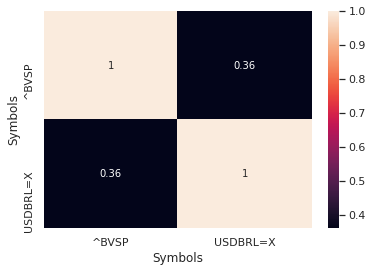

In [0]:
# Calcular a correlação entre os Ativo.
sns.heatmap(portfolio.corr(), annot=True)

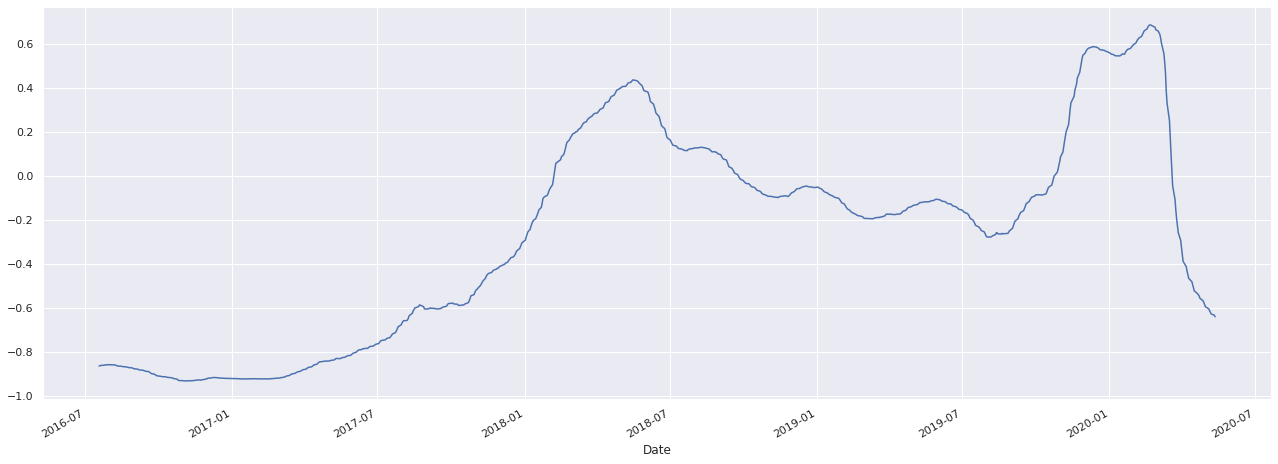

In [0]:
# Desenhe um gráfico de correlação para o período de 252(Um ano em dias úteis) para os Ativos selecionados.
portfolio["USDBRL=X"].rolling(252).corr(portfolio["^BVSP"]).plot(figsize=(22,8))

In [0]:
# Dolarizando ^BVSP
portfolio["^BVSP_in_Dolar"] = (portfolio["^BVSP"] / portfolio["USDBRL=X"])
portfolio

Symbols,^BVSP,USDBRL=X,^BVSP_in_Dolar
Date,,,
2015-05-18,56204.000000,3.00580,18698.516147
2015-05-19,55499.000000,3.03160,18306.834684
2015-05-20,54901.000000,3.00170,18289.969478
2015-05-21,55112.000000,3.03670,18148.648142
2015-05-25,54609.000000,3.09320,17654.532704
...,...,...,...
2020-05-05,79471.000000,5.57810,14246.965291
2020-05-06,79064.000000,5.71520,13833.986690
2020-05-07,78119.000000,5.82872,13402.427764


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fad548a48d0>,
      dtype=object)

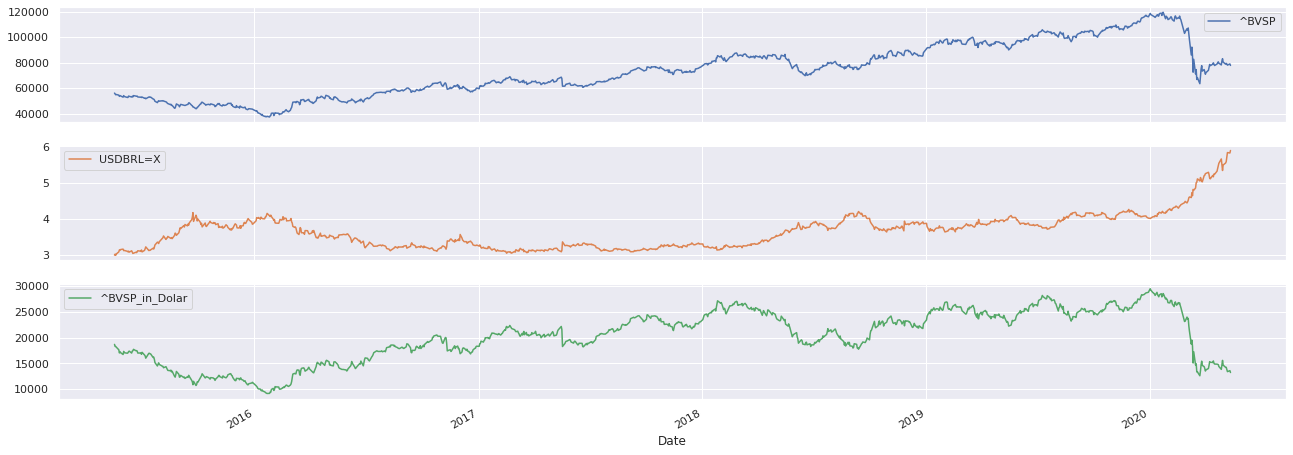

In [0]:
# Desenhe o gráfico da correlação anterior
portfolio.plot(subplots=True, figsize=(22,8))

In [0]:
# %portfolio2 %ibov Relacionando Ativos e o índice ^BVSP
portfolio2 = yf.download("ITUB3.SA, ITUB4.SA, ITSA3.SA, ITSA4.SA", period="5y")["Adj Close"]
ibov = yf.download("^BVSP", period="5y")["Adj Close"]
portfolio2, ibov

[*********************100%***********************]  4 of 4 completed
[*********************100%***********************]  1 of 1 completed


(             ITSA3.SA  ITSA4.SA   ITUB3.SA   ITUB4.SA
 Date                                                 
 2015-05-12   5.679765  5.745818  15.013877  16.781778
 2015-05-13   5.620596  5.638643  14.996689  16.666710
 2015-05-14   5.632432  5.686276  15.061206  16.830490
 2015-05-15   5.744842  5.745818  15.340974  17.144880
 2015-05-18   5.614683  5.674369  15.108614  16.688807
 ...               ...       ...        ...        ...
 2020-05-06  10.240000  8.700000  21.500000  22.240000
 2020-05-07   9.970000  8.290000  20.799999  21.440001
 2020-05-08  10.190000  8.490000  21.340000  22.320000
 2020-05-11  10.060000  8.490000  21.709999  22.469999
 2020-05-12   9.670000  8.180000  20.900000  21.610001
 
 [1242 rows x 4 columns], Date
 2015-05-12    56792.000000
 2015-05-13    56372.000000
 2015-05-14    56657.000000
 2015-05-15    57249.000000
 2015-05-18    56204.000000
                   ...     
 2020-05-06    79064.000000
 2020-05-07    78119.000000
 2020-05-08    80263.000000


In [0]:
# Estabelecer uma correlação entre Ativos.
portfolio2.corr()

,ITSA3.SA,ITSA4.SA,ITUB3.SA,ITUB4.SA
ITSA3.SA,1.000000,0.981975,0.968018,0.959493
ITSA4.SA,0.981975,1.000000,0.985574,0.981992
ITUB3.SA,0.968018,0.985574,1.000000,0.995821
ITUB4.SA,0.959493,0.981992,0.995821,1.000000


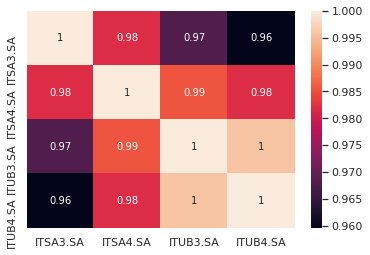

In [0]:
# Calcular a correlação entre os Ativo.
sns.heatmap(portfolio2.corr(), annot=True)

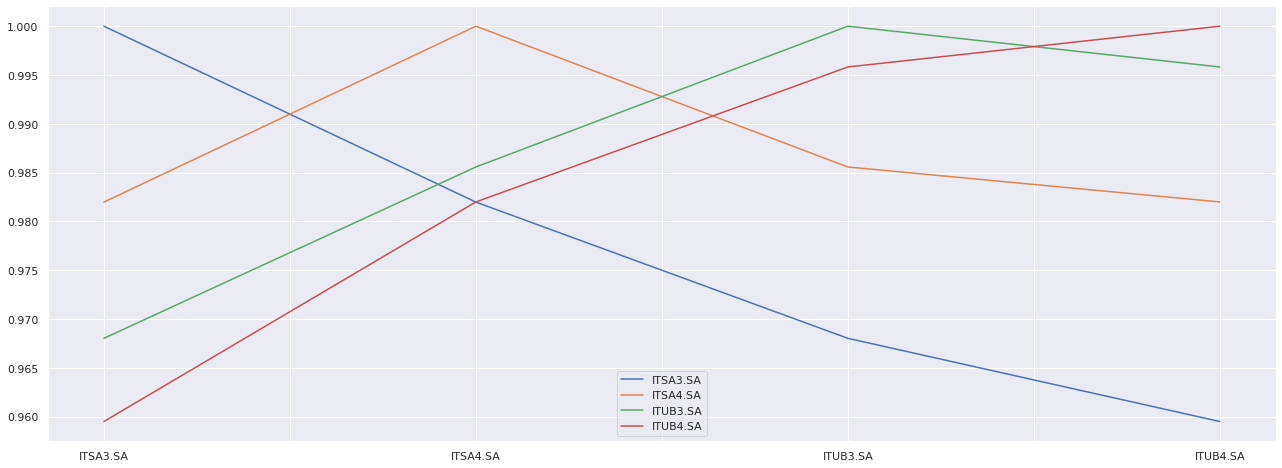

In [0]:
# Desenhe um gráfico de correlação dos Ativos relacionados.
portfolio2.corr().plot(figsize=(22,8))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fad4ea259e8>,
      dtype=object)

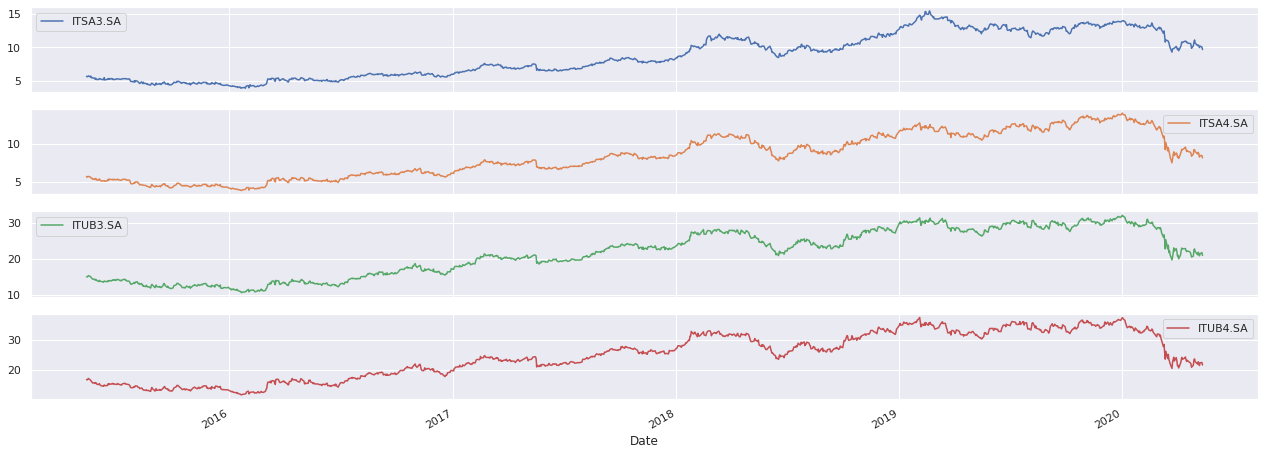

In [0]:
# Desenhe o gráfico da correlação anterior
portfolio2.plot(subplots=True, figsize=(22,8))

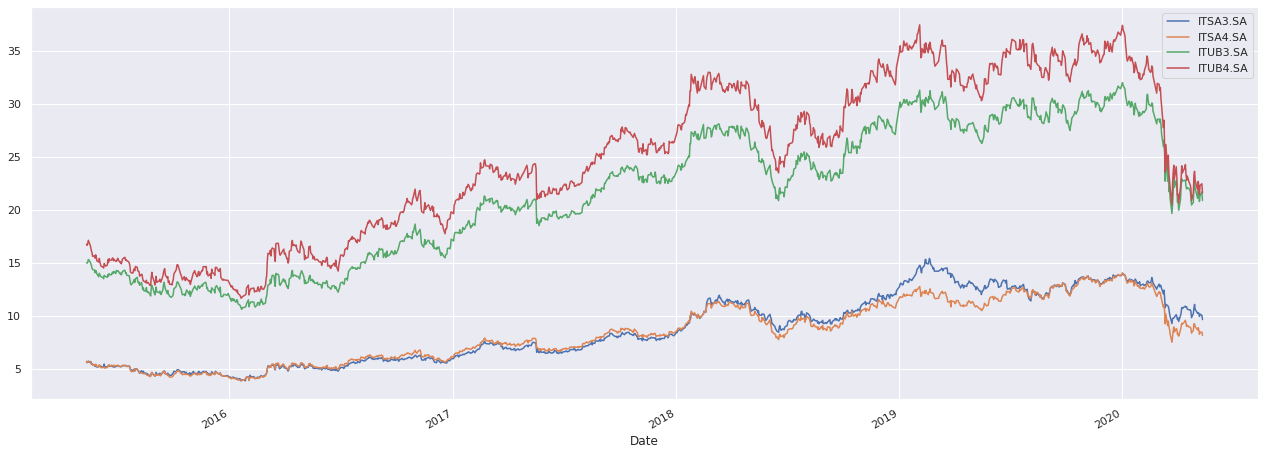

In [0]:
# Desenhando a relação de Ativos.
portfolio2.plot(figsize=(22,8))

In [0]:
# %portfolio_ajusted Normalizar a correlação de Ativos simulando uma compra de 10 Mil reais em cada Ativo.
portfolio2_ajusted = (portfolio2 / portfolio2.iloc[0])*10000
portfolio2_ajusted

,ITSA3.SA,ITSA4.SA,ITUB3.SA,ITUB4.SA
Date,,,,
2015-05-12,10000.000000,10000.000000,10000.000000,10000.000000
2015-05-13,9895.826075,9813.473243,9988.551876,9931.432514
2015-05-14,9916.664218,9896.374669,10031.523469,10029.026588
2015-05-15,10114.576626,10000.000000,10217.863075,10216.366795
2015-05-18,9885.414979,9875.651595,10063.099660,9944.599553
...,...,...,...,...
2020-05-06,18028.915327,15141.447784,14320.085426,13252.469033
2020-05-07,17553.544398,14427.885552,13853.849579,12775.761964
2020-05-08,17940.883176,14775.964487,14213.517450,13300.139740


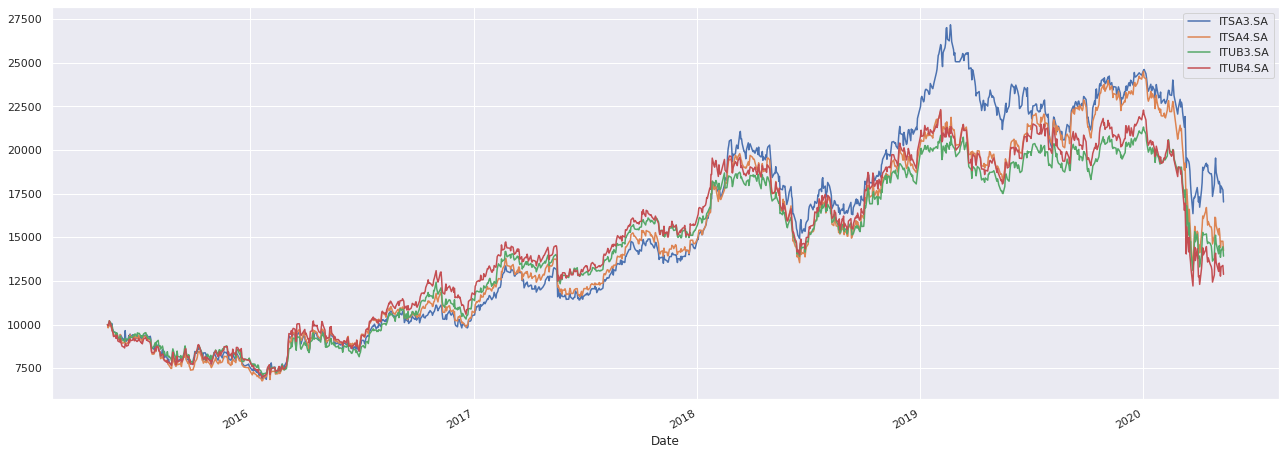

In [0]:
# Desenhe a relação simulada anterior
portfolio2_ajusted.plot(figsize=(22,8))

In [0]:
# Criar uma coluna de Saldo para o efeito de relacionar a perfomance do portfolio.
portfolio2_ajusted["RESULTS"] = portfolio2_ajusted.sum(axis=1)
portfolio2_ajusted                                                    

,ITSA3.SA,ITSA4.SA,ITUB3.SA,ITUB4.SA,RESULTS
Date,,,,,
2015-05-12,10000.000000,10000.000000,10000.000000,10000.000000,40000.000000
2015-05-13,9895.826075,9813.473243,9988.551876,9931.432514,39629.283708
2015-05-14,9916.664218,9896.374669,10031.523469,10029.026588,39873.588945
2015-05-15,10114.576626,10000.000000,10217.863075,10216.366795,40548.806496
2015-05-18,9885.414979,9875.651595,10063.099660,9944.599553,39768.765787
...,...,...,...,...,...
2020-05-06,18028.915327,15141.447784,14320.085426,13252.469033,60742.917570
2020-05-07,17553.544398,14427.885552,13853.849579,12775.761964,58611.041492
2020-05-08,17940.883176,14775.964487,14213.517450,13300.139740,60230.504853


In [0]:
# %ibov_ajusted Normalizar o ^BVSP simulando uma compra de 40 Mil reais (Relação de Ativos anterior).
ibov_ajusted = (ibov / ibov.iloc[0])*40000
ibov_ajusted

Date
2015-05-12    40000.000000
2015-05-13    39704.183688
2015-05-14    39904.916185
2015-05-15    40321.876321
2015-05-18    39585.857163
                  ...     
2020-05-06    55686.716439
2020-05-07    55021.129737
2020-05-08    56531.201578
2020-05-11    55687.420763
2020-05-12    54847.128557
Name: Adj Close, Length: 1236, dtype: float64

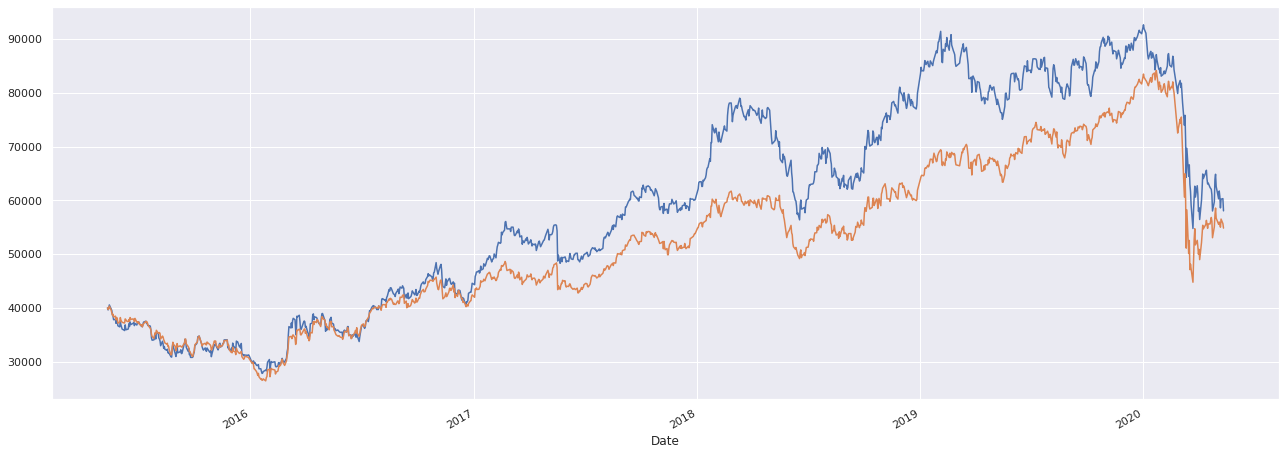

In [0]:
# Desenhe a relação de Ativos e o ^BVSP
portfolio2_ajusted["RESULTS"].plot(figsize=(22,8), label="Portfolio Ajusted")
ibov_ajusted.plot(label="ibov")


In [0]:
# Calcular o retorno diário dos Ativos relacionados.
porfolio2_returns = portfolio2.pct_change()
porfolio2_returns = porfolio2_returns.dropna()
porfolio2_returns

,ITSA3.SA,ITSA4.SA,ITUB3.SA,ITUB4.SA
Date,,,,
2015-05-13,-0.010417,-0.018653,-0.001145,-0.006857
2015-05-14,0.002106,0.008448,0.004302,0.009827
2015-05-15,0.019958,0.010471,0.018575,0.018680
2015-05-18,-0.022657,-0.012435,-0.015146,-0.026601
2015-05-19,0.017914,-0.015740,-0.011677,-0.014062
...,...,...,...,...
2020-05-06,-0.009671,-0.023569,-0.013761,-0.020264
2020-05-07,-0.026367,-0.047126,-0.032558,-0.035971
2020-05-08,0.022066,0.024125,0.025962,0.041045


In [0]:
# Filtrando ativos requeridos + Results + Returns
portfolio3 = 10000 * portfolio2
portfolio3["RESULTS"] = portfolio3.sum(axis=1)
portfolio3["RETURNS"] = portfolio3["RESULTS"].pct_change()
portfolio3["RETURNS"] = portfolio3["RETURNS"].fillna(0)
portfolio3

,ITSA3.SA,ITSA4.SA,ITUB3.SA,ITUB4.SA,RESULTS,RETURNS
Date,,,,,,
2015-05-12,56797.647476,57458.176613,150138.769150,167817.783356,432212.376595,0.000000
2015-05-13,56205.964088,56386.427879,149966.888428,166667.098999,429226.379395,-0.006909
2015-05-14,56324.319839,56862.764359,150612.058640,168304.901123,432104.043961,0.006704
2015-05-15,57448.415756,57458.176613,153409.738541,171448.802948,439765.133858,0.017730
2015-05-18,56146.831512,56743.693352,151086.139679,166888.065338,430864.729881,-0.020239
...,...,...,...,...,...,...
2020-05-06,102399.997711,86999.998093,215000.000000,222399.997711,626799.993515,-0.016784
2020-05-07,99700.002670,82899.999619,207999.992371,214400.005341,605000.000000,-0.034780
2020-05-08,101899.995804,84899.997711,213400.001526,223199.996948,623399.991989,0.030413
